<a href="https://colab.research.google.com/github/DyiyahKresnaEniArofah/Dyiyah-Kresna-Eni-Arofah/blob/main/UAS_Analisis_Regresi_RFS_Dyiyah_Kresna_Eni_A_1900015004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impor Library yang Dibutuhkan

In [69]:
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

#Membuka Dataset

In [70]:
df = pd.read_csv("/content/USvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


Informasi Dataset

#Exploratory Data Analysis (EDA)

##Mengecek Dimensi Data

In [71]:
df.shape

(40949, 16)

Data yang terdapa pada dataset "INvideos" terdapat 16 kolom dan 37352 baris dimana data tersebut terdiri dari 37352 obaervasi dan 16 karakteristik

##Variabel Dataset

In [72]:
df.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype=object)

##Type Data

In [73]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## Informasi Data

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

## Memisal data categori dan data numerik

In [75]:
categs = ['video_id','trending_date','title','channel_title','publish_time','tags','thumbnail_link','comments_disabled',
       'ratings_disabled','video_error_or_removed','description']
nums = ['category_id','views','likes','dislikes','comment_count']

##Melihat Statistika Data

###Statistical Numerical Data

In [76]:
df[nums].describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Kesimpulan dari Data Statistik Numerik 
*  'category_id','views','likes','dislikes','comment_count' terlihat miring (rata-rata & median tidak cukup dekat)





###Statistical Categorical Data

In [77]:
df[categs].describe()

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40949,40949,40949,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,2,2,2,6901
top,j4KvrAUjn6c,18.11.03,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,40316,40780,40926,58


##Mengecek Outlier

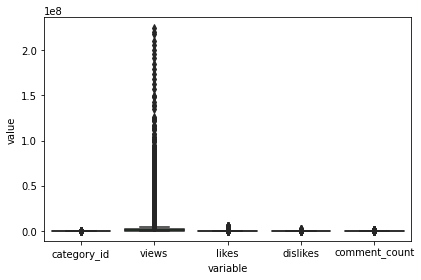

In [78]:
df1=df[nums].select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()

##Melihat Korelasi Data

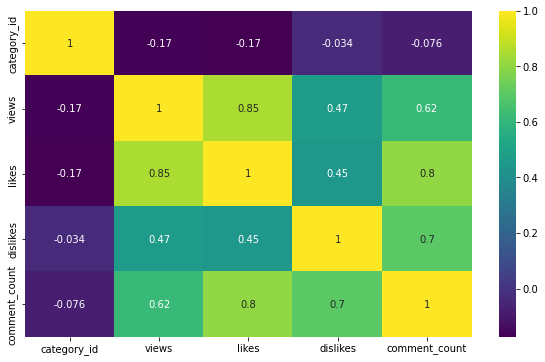

In [79]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

##Plot Distribusi Data Numerik

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

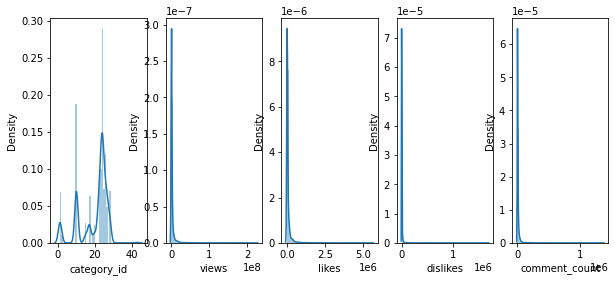

In [80]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

#Data Preprocessing

##Menghapus Outlier

In [81]:
#Menghitung Skor IQR
sorted(df1)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

category_id                     8.0
views                     1580828.0
likes                       49993.0
dislikes                     1736.0
comment_count                5141.0
comments_disabled               0.0
ratings_disabled                0.0
video_error_or_removed          0.0
dtype: float64


In [82]:
#Menghapus Outlier
df_clear = df1[~((df < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,category_id,views,likes,dislikes,comment_count
3,24,343168,10172,666,2146
5,28,119180,9763,511,1434
6,24,2103417,15993,2445,1970
7,28,817732,23663,778,3432
9,25,256426,12654,1363,2368
...,...,...,...,...,...
40933,27,979732,29038,1121,2584
40936,20,3229540,109945,3062,6774
40944,15,1685609,38160,1385,2657
40945,22,1064798,60008,382,3936


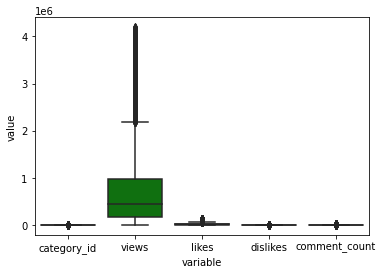

In [83]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

In [84]:
df_clear.isnull().sum()

category_id      0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

##Normalisasi Data

In [85]:
#Normalisasi data dengan MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,category_id,views,likes,dislikes,comment_count
0,0.736842,0.081724,0.078022,0.146631,0.159578
1,0.947368,0.028297,0.074885,0.112506,0.106633
2,0.736842,0.501592,0.122671,0.538309,0.146490
3,0.947368,0.194921,0.181502,0.171290,0.255205
4,0.789474,0.061034,0.097060,0.300088,0.176086
...,...,...,...,...,...
30294,0.894737,0.233562,0.222730,0.246808,0.192148
30295,0.526316,0.770203,0.843311,0.674152,0.503718
30296,0.263158,0.401933,0.292699,0.304932,0.197576
30297,0.631579,0.253853,0.460279,0.084104,0.292683


##Memiih Variabel Target dan Independent

In [86]:
y=df_norm['views']
X=df_norm.drop(columns=['views','category_id'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0.08172401 0.02829674 0.50159157 ... 0.40193293 0.25385252 0.2542468 ]
[[0.07802229 0.14663144 0.15957763]
 [0.07488514 0.1125055  0.10663296]
 [0.12267111 0.53830911 0.14649018]
 ...
 [0.29269864 0.30493175 0.19757585]
 [0.46027935 0.08410392 0.29268293]
 [0.36869597 0.22721268 0.29684711]]


#Prosesing 

In [87]:
y = df_norm.views.values
x_data = df_norm.drop(['views'], axis = 1)

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=45)

x_train, x_test, y_train, y_test = train_test_split(x, y)

#Uji Coba

In [88]:
pred = regressor.predict(x_test) #Predicting the views

In [89]:
np.exp(pred).round() # inverse log transform

array([1., 1., 1., ..., 1., 1., 1.])

##Evaluasi

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, x_train, y_train, x_test, y_test):
    print("MAE: %.2f" % mean_absolute_error(y_test, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_test, pred)) # Explained variance score: 1 is perfect prediction

In [91]:
pred = regressor.predict(x_test)

print('Coefficients: \n', regressor.coef_) # The slope
print('Intercept: \n', regressor.intercept_) # The Intercept

eval_regression(regressor, pred, x_train, y_train, x_test,y_test)

Coefficients: 
 [-0.00719989  0.48319617  0.38544232 -0.04348339]
Intercept: 
 0.040918217090861325
MAE: 0.07
RMSE: 0.12
R2 score: 0.58


##Fit Random Forest Model

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,random_state=100,max_depth=30)
best_model1 = rf.fit(x_train, y_train)
pred = rf.predict(x_test)
eval_regression(rf, pred, x_train, y_train, x_test, y_test)

MAE: 0.04
RMSE: 0.08
R2 score: 0.81
